### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon).

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

**Note:** You will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp).
You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons.

The dataset contains separate folders for training and validation.


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
% matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import load_img

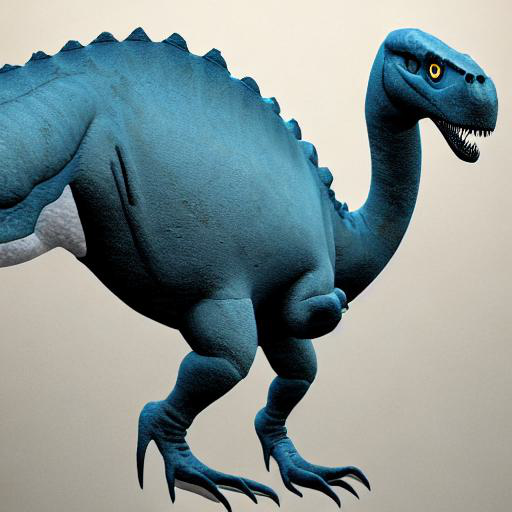

In [8]:
path = './Dino or Dragon/train/dino'
name = '0af9b17d-b80f-405e-b555-4a9fac81da9c.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91889664/91884032 [==============================] - 140s 2us/step


### The shape for input should be `(150, 150, 3)`

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "./Dino or Dragon/train",
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_gen  = val_gen.flow_from_directory(
    "./Dino or Dragon/test",
    target_size=(150, 150),
    batch_size=32
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [20]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

 4440064/83683744 [>.............................] - ETA: 12:45

In [49]:
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.Conv2D(32, [3, 3], activation='relu')(base)

max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                           strides=(1, 1), padding='valid')(vectors)

flatten_layers = tf.keras.layers.Flatten()(max_pool_2d)
danse_layer = tf.keras.layers.Dense(64, activation='relu')(flatten_layers)

outputs = keras.layers.Dense(1, activation='relu')(danse_layer)

model = keras.Model(inputs, outputs)
model.output_shape

(None, 1)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`



answer: categorical crossentropy

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that.

- 9215873
- 11215873
- 14215873
- 19215873



In [50]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 3, 3, 32)          589856    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65  

answer: 21,459,657

### Generators and Training

For the next two questions, use the following data generator for both train and validation:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and validation

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
```


In [51]:
train_gen = ImageDataGenerator(rescale=1. / 255,
                               preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "./Dino or Dragon/train",
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

val_gen = ImageDataGenerator(rescale=1. / 255,
                               preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./Dino or Dragon/test",
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [55]:
train_ds.image_shape

(150, 150, 3)

In [54]:
val_ds.image_shape

(150, 150, 3)

In [57]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.002, momentum=0.8, nesterov=False, name="SGD")
loss = keras.losses.CategoricalCrossentropy(from_logits=False)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [58]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 146s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 137s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
13/80 [===>..........................] - ETA: 1:31 - loss: nan - accuracy: 0.5000

KeyboardInterrupt: 

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20


### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33


### Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`


### Question 5

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of validation loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97


### Question 6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24


## Submit the results

- Submit your results here: https://forms.gle/XdH5ztBddvTvxzpT6
- You can submit your solution multiple times. In this case, only the last submission will be used
- If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 21 November 2022, 23:00 CEST.

After that, the form will be closed.